
<div style="padding:20px; 
            color:#150d0a;
            margin:10px;
            font-size:220%;
            text-align:center;
            display:fill;
            border-radius:20px;
            border-width: 5px;
            border-style: solid;
            border-color: #150d0a;
            background-color:#289C4E;
            overflow:hidden;
            font-weight:500">A/B Testing in E-Commerce</div>

### <font color='289C4E'>Table of contents<font><a class='anchor' id='top'></a>

1. [Introduction](#intro) \
   1.1. [Overview](#overview) \
   1.2. [Objective](#objective) \
   1.3. [Methodologies](#methodologies)
2. [Experiment Design](#experiment_design) \
   2.1. [Baseline Values](#baseline_values) \
   2.2. [Hypothesis](#hypothesis) \
   2.3. [Sample size calculation](#sample_size_calculation) \
   2.4. [Sanity Check](#sanity_check) 
3. [hypothesis testing](#hypothesis_testing) 
4.  [Permutation](#permutation) \
    4.1.  [Interpretation](#interpretation_permutation)
5.  [Multi Arm Bendit](#multi_arm)
6.  [Conclusion](#conclusion)


## 1. Introduction <a class='anchor' id='intro'></a>


### 1.1 Overview <a class='anchor' id='overview'></a>

In today’s, businesses must optimize their strategies to enhance user experience and drive conversions. This project focuses on delivering advanced A/B testing solutions utilizing a comprehensive suite of methodologies, including bootstrapping, permutation testing, and multi-arm bandit approaches.



### 1.2 Objective <a class='anchor' id='objective'></a>

* To compare the performance of multiple landing page designs using robust and flexible A/B testing techniques. 
* To determine the design that yields the highest conversion rate and customer satisfaction.
* To check if the results are practical significant to matter in real world scenarios.


### 1.3 Methodologies: <a class='anchor' id='methodologies'></a>
1. Bootstrapping:
* Employed bootstrapping methods to estimate the confidence intervals of the results, enhancing the robustness of the findings.
2. Permutation Testing:
* Utilized permutation tests to assess the statistical significance of the differences between groups, ensuring reliable conclusions.
3. Multi-Armed Bandit Approach:
* Implemented a multi-armed bandit strategy to optimize real-time decision-making, allocating traffic dynamically to the best-performing variants.
   




## 2 Experiment Design <a class='anchor' id='experiment_design'></a> [↑](#top)

### 2.1 Baseline Values <a class='anchor' id='baseline_values'></a>

Baseline conversion rate  = 2 % \
mde = 0.2%


### 2.2 Hypothesis <a class='anchor' id='hypothesis'></a>


$
H_0: \text{No effect or no difference}
$

$
H_1: \text{There is an effect or there is a difference}
$

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
import seaborn as sns
import  warnings
from scipy import stats
from scipy.stats import norm
import math as mt
import random



warnings.filterwarnings("ignore")

pd.options.display.float_format = '{:.4f}'.format


In [2]:
df = pd.read_csv('E-commerce\e-commerce.csv')
country  =pd.read_csv('E-commerce\countries.csv')

all_df = pd.merge(df,country , on  = 'user_id',how ='left')
all_df.head()

,user_id,timestamp,group,landing_page,converted,country
0,851104,11:48.6,control,old_page,0,US
1,804228,01:45.2,control,old_page,0,US
2,661590,55:06.2,treatment,new_page,0,US
3,853541,28:03.1,treatment,new_page,0,US
4,864975,52:26.2,control,old_page,1,US


In [3]:
def data_info(df):
    print("Dimensions of the dataset: ", df.shape)
    print("Data Types of the dataset: ", df.dtypes)
    print("Integer values in the dataset: ", df.select_dtypes(include=['int64']).columns.tolist())
    print("Boolean values in the dataset: ", df.select_dtypes(include=['bool']).columns.tolist())
    print("Missing values in the dataset: ", df.isnull().sum().sum())
    
data_info(all_df)

Dimensions of the dataset:  (294482, 6)
Data Types of the dataset:  user_id          int64
timestamp       object
group           object
landing_page    object
converted        int64
country         object
dtype: object
Integer values in the dataset:  ['user_id', 'converted']
Boolean values in the dataset:  []
Missing values in the dataset:  0


In [4]:
duplicates = all_df[all_df.duplicated('user_id',keep = False)]
duplicates

,user_id,timestamp,group,landing_page,converted,country
22,767017,58:15.0,control,new_page,0,US
192,656468,13:29.8,treatment,new_page,1,US
226,773693,05:45.2,control,old_page,1,UK
240,733976,11:16.4,control,new_page,0,US
246,704650,10:52.7,treatment,new_page,0,US
...,...,...,...,...,...,...
294329,641570,59:27.7,control,old_page,0,UK
294332,689637,34:28.3,control,new_page,0,CA
294356,744456,32:07.1,treatment,new_page,0,US
294479,759899,20:29.0,treatment,new_page,0,US


In [5]:
all_df.drop_duplicates(subset=['user_id'], inplace=True)

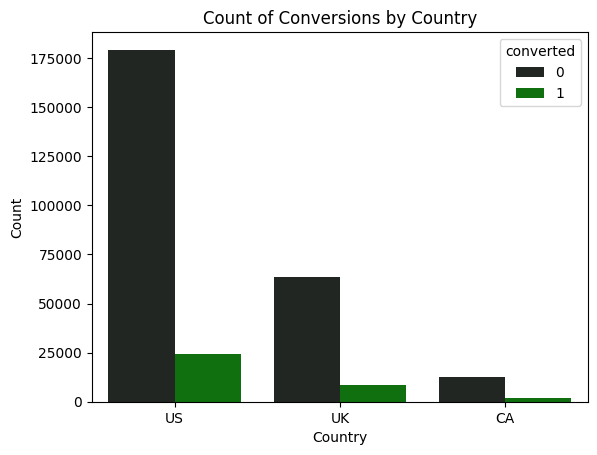

In [6]:

country_counts = all_df['country'].value_counts()
sns.countplot(x='country', hue='converted', data=all_df, color='green', 
               order=country_counts.index)

plt.xlabel("Country")    
plt.ylabel("Count")       
plt.title("Count of Conversions by Country")  
plt.show()

### 2.3 Sample Size Calculation for A/B Testing <a class='anchor' id='sample_size_calculation'></a> [↑](#top)


In [7]:
import math
from statsmodels.stats.proportion import proportion_effectsize
from statsmodels.stats.power import NormalIndPower

# Input parameters
baseline_conversion_rate = 0.02  # Baseline conversion rate (2%)
mde = 0.002  # Minimum detectable effect (0.2%)
alpha = 0.05  # Significance level (5%)
power = 0.80  # Statistical power (80%)

effect_size = proportion_effectsize(baseline_conversion_rate, baseline_conversion_rate + mde)

analysis = NormalIndPower()
sample_size_per_group = analysis.solve_power(effect_size, power=power, alpha=alpha, ratio=1, alternative='two-sided')

total_sample_size = math.ceil(sample_size_per_group * 2)

print(f"Required sample size per group: {math.ceil(sample_size_per_group)}")
print(f"Total sample size (both groups): {total_sample_size}") 
print(f"Actual Total sample size is {all_df.shape[0]}")

Required sample size per group: 80638
Total sample size (both groups): 161275
Actual Total sample size is 290585


### 2.4 Sanity Check <a class='anchor' id='sanity_check'></a> [↑](#top)


First thing we have to do before even beginning to analyze this experiment's results is sanity checks. These checks help verify that the experiment was conducted as expected and that other factors did not influence the data which we collected. This also makes sure that data collection was correct.



<div class="alert alert-block alert-danger">  


we using user_id as a proxy for page_views as an Invariant metrics

</div>

Invariant metrics are metrics that should not change between control and experiment groups in an experiment. They act as a sanity check to ensure that the experiment is designed correctly and running without any serious bugs. 

In [8]:
# user_id count for control and treatment groups for all_df
pageviews_cont = all_df[all_df['group'] == 'control']['user_id'].count()
pageviews_exp = all_df[all_df['group'] == 'treatment']['user_id'].count()
pageviews_total=pageviews_cont+pageviews_exp

print ("number of pageviews in control:", pageviews_cont)
print ("number of Pageviewsin experiment:" ,pageviews_exp)

number of pageviews in control: 145232
number of Pageviewsin experiment: 145353


Ok so these look like pretty close numbers. Now, let's make sure this difference in amounts is not significant and is random and even like we expected. We can model this diversion in the following way:
We expect the amount of pageviews in the control group to be about a half (50%) of the total pageviews in both groups, so we can define a random variable with an easy to use distribution.
A binomial random variable will be the number of successes we can expect to get out of N experiments, given the probability of a single success. So, if we consider being assigned to a group (control, for example) a success with probability 0.5 (random!), the number of samples which get assigned to the group is the value of our random binomial variable!

The code Below calculates the confidence interval for a sample proportion derived from the number of successful observations (pageviews_cont) and the total observations (pageviews_total). It computes the sample proportion (p_hat), the standard deviation of this proportion, and the z-score based on a specified confidence level (defaulting to 95%). The margin of error is then determined by multiplying the z-score with the standard deviation, allowing the calculation of the confidence interval's lower and upper bounds. Finally, the function outputs the confidence interval and checks if the sample proportion falls within this range, providing insight into the variability of the data in statistical analyses like A/B testing.

In [9]:
import math as mt
def get_z_score(alpha):
    return norm.ppf(alpha)
p=0.5
alpha=0.05
p_hat=round(pageviews_cont/(pageviews_total),4)
sd=mt.sqrt(p*(1-p)/(pageviews_total))
ME=round(get_z_score(1-(alpha/2))*sd,4)
print ("The confidence interval is between",p-ME,"and",p+ME,"; Is",p_hat,"inside this range?")

The confidence interval is between 0.4982 and 0.5018 ; Is 0.4998 inside this range?


Our observed  p^
  is inside this range which means the difference in number of samples between groups is expected. Invariant metric sanity test passes!

In [10]:
control = all_df[all_df['group'] == 'control']
treatment = all_df[all_df['group'] == 'treatment']

conversion_treatment = treatment['converted'].mean()
conversion_control = control['converted'].mean()

print("Conversion Rate for Treatment: {:.4f}".format(conversion_treatment))
print("Conversion Rate for Control: {:.4f}".format(conversion_control))


Conversion Rate for Treatment: 0.1188
Conversion Rate for Control: 0.1203


This  code defines a bootstrapping function that estimates the differences in means between two datasets, data1 and data2. It generates a specified number of bootstrap samples (default is 5000) by randomly sampling with replacement from each dataset, calculating the mean for each sample. The function then computes the differences between the means of the second dataset and the first for each bootstrap sample, storing these differences in a list. Finally, it returns an array of these bootstrapped differences, which can be used for statistical analysis, such as hypothesis testing or confidence interval estimation.

In [11]:
# Bootstrapping function
def bootstrap(data1, data2, n_bootstrap=5000):
    # Differences in means for each bootstrap sample
    boot_diffs = []
    for _ in range(n_bootstrap):
        sample1 = np.random.choice(data1, size=len(data1), replace=True)
        sample2 = np.random.choice(data2, size=len(data2), replace=True)
        boot_diffs.append(np.mean(sample2) - np.mean(sample1))
    return np.array(boot_diffs)


boot_diffs = bootstrap(control['converted'].values, treatment['converted'].values)

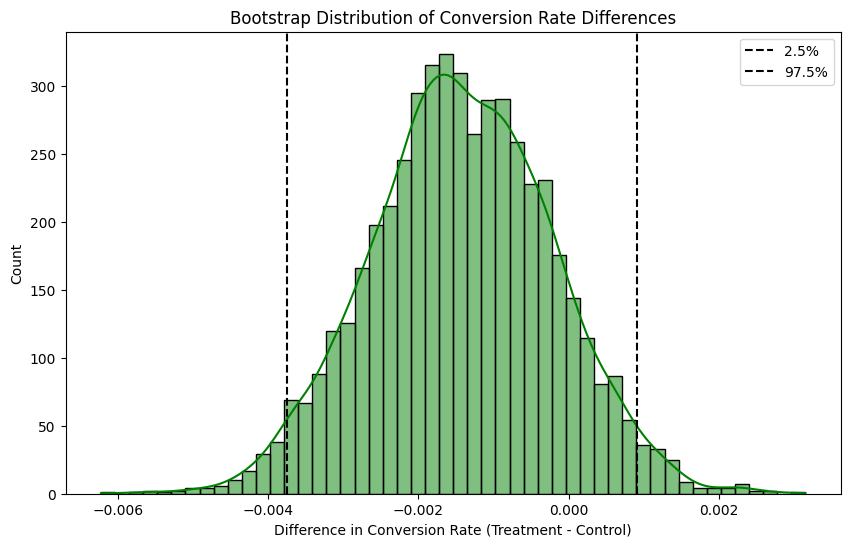

In [22]:
# Plot the bootstrap results
plt.figure(figsize=(10,6))
sns.histplot(boot_diffs, kde=True, color='green')  # Change bars to green
plt.axvline(np.percentile(boot_diffs, 2.5), linestyle='--', color='black', label='2.5%')  # Change line to black
plt.axvline(np.percentile(boot_diffs, 97.5), linestyle='--', color='black', label='97.5%')  # Change line to black
plt.title("Bootstrap Distribution of Conversion Rate Differences")
plt.xlabel("Difference in Conversion Rate (Treatment - Control)")
plt.legend()
plt.show()


<div class="alert alert-block alert-info">

* Red Dashed Lines: The vertical dashed lines at the 2.5% and 97.5% percentiles mark the lower and upper bounds of a 95% confidence interval for the difference in conversion rates.
* KDE Curve: The overlapping KDE provides a smooth estimate of the distribution, highlighting the areas of higher density of the bootstrapped differences.
* Interpretation: The area under the histogram shows the range of differences observed, while the confidence interval lines suggest where we can expect the true difference in conversion rates to lie with 95% confidence.

</div>

In [13]:
# Confidence intervals
ci_lower = np.percentile(boot_diffs, 2.5)
ci_upper = np.percentile(boot_diffs, 97.5)

print(f"95% Confidence Interval for the difference in conversion rates: [{ci_lower}, {ci_upper}]")

95% Confidence Interval for the difference in conversion rates: [-0.003748069323081301, 0.0009114461266831071]


<div class="alert alert-block alert-info">


The fact that the interval includes zero indicates that there is no statistically significant difference between the conversion rates of the two groups at the 95% confidence level.

* The lower bound of the interval (-0.00376) suggests that the conversion rate for the control group could be up to 0.376% lower than that for the variant group.
* The upper bound (0.00084) indicates that the conversion rate for the control group could be up to 0.084% higher than that for the variant group.

Since both bounds are close to zero and include it, you cannot conclude that one group significantly outperforms the other based on this analysis.

</div>

In [14]:
n_control = len(control)
n_treatment = len(treatment)

print(f"Sample size for control is {n_control} and sample size for treatment is  {n_treatment}")

Sample size for control is 145232 and sample size for treatment is  145353


## 3. Hypothesis Testing <a class='anchor' id='hypothesis_testing'></a> [↑](#top)

In [15]:
control_conversion_rate = control['converted'].mean()
treatment_conversion_rate = treatment['converted'].mean()
# Pooled conversion rate
p_pooled = (control['converted'].sum() + treatment['converted'].sum()) / (n_control + n_treatment)

# Standard error of the difference in conversion rates
se_diff = np.sqrt(p_pooled * (1 - p_pooled) * (1/n_control + 1/n_treatment))

# Z-statistic
z_stat = (treatment_conversion_rate - control_conversion_rate) / se_diff

# P-value
p_value = stats.norm.sf(abs(z_stat)) * 2  # two-tailed test

In [16]:
print(f"Z-statistic: {z_stat}")
print(f"P-value: {p_value}")

Z-statistic: -1.2090677477177405
P-value: 0.22663681880712272


<div class="alert alert-block alert-info">


* Z-statistic: A Z-statistic of -1.209 indicates how many standard deviations the observed difference in conversion rates is from the mean under the null hypothesis. A negative value suggests that the conversion rate for the treatment group is lower than that of the control group.

* P-value: A P-value of approximately 0.227 indicates the probability of observing the data (or something more extreme) under the null hypothesis, which typically states that there is no difference in conversion rates between the treatment and control groups.

</div>

In [17]:
def cohen_h(p1, p2):
    return 2 * (np.arcsin(np.sqrt(p1)) - np.arcsin(np.sqrt(p2)))

effect_size = cohen_h(control_conversion_rate, treatment_conversion_rate)
print(f"Cohen's h (Effect Size): {effect_size}")

# Interpretation of the effect size
if effect_size < 0.2:
    interpretation = "small"
elif effect_size < 0.5:
    interpretation = "medium"
else:
    interpretation = "large"
print(f"Effect Size Interpretation: {interpretation}")

# Result Interpretation
if p_value < 0.05:
    print("The result is statistically significant, reject the null hypothesis.")
else:
    print("The result is not statistically significant, fail to reject the null hypothesis.")

Cohen's h (Effect Size): 0.0044858574019009945
Effect Size Interpretation: small
The result is not statistically significant, fail to reject the null hypothesis.


<div class="alert alert-block alert-info">


1. Cohen's h (Effect Size): The calculated effect size of approximately 0.0045 is extremely small, indicating that there is a negligible difference in conversion rates between the treatment and control groups. Cohen's h is typically interpreted as follows:

* Small effect: < 0.2
* Medium effect: 0.2 to < 0.5
* Large effect: > 0.5 This result confirms that the difference in conversion rates is practically insignificant.

2. Effect Size Interpretation: Given that the effect size is categorized as small, it suggests that any observed difference in conversion rates is likely not meaningful in practical terms. This means that the treatment had little to no impact on improving conversion rates.
3. Statistical Significance: The conclusion of "not statistically significant, fail to reject the null hypothesis" indicates that the evidence does not support the idea that the treatment made a significant difference compared to the control. In simple terms, we cannot confidently say that the treatment had any real effect.
4. Business Implications: The combination of a small effect size and a lack of statistical significance suggests that the treatment may not be worth pursuing further. It may be beneficial to look into other strategies or treatments to improve conversion rates, as the current approach may not be effective.
5. Recommendation for Future Research: Consider exploring different treatments, adjusting the experimental design, or increasing sample sizes to gain more definitive insights. Additionally, analyzing other metrics or factors that could influence conversion rates might provide valuable information for optimizing strategies.

</div>


## 4. Permutation for significance testing <a class='anchor' id='permutation'></a> [↑](#top)

Observed Difference in Conversion Rates: 0.0015
P-value from Permutation Test: 0.2136


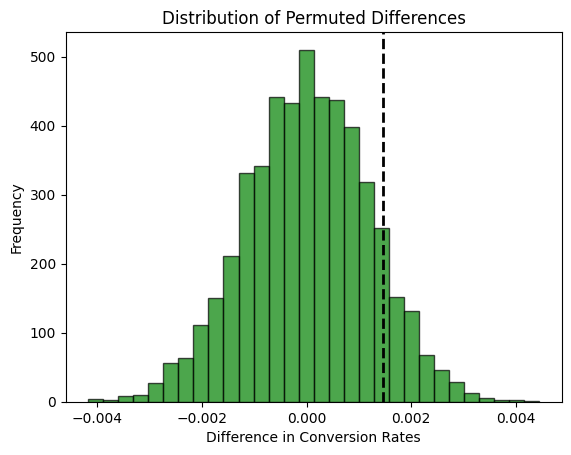

In [23]:

def permutation_test(data, group_col, outcome_col, num_permutations=5000):
      
    group_a = data[data[group_col] == 'control'][outcome_col]
    group_b = data[data[group_col] == 'treatment'][outcome_col]

    observed_diff = group_a.mean() - group_b.mean()

    combined = np.concatenate([group_a, group_b])
    
    perm_diffs = np.zeros(num_permutations)

    for i in range(num_permutations):
        np.random.shuffle(combined)
        
        new_group_a = combined[:len(group_a)]
        new_group_b = combined[len(group_a):]
        
        perm_diffs[i] = new_group_a.mean() - new_group_b.mean()

    p_value = np.sum(np.abs(perm_diffs) >= np.abs(observed_diff)) / num_permutations

    return p_value, observed_diff, perm_diffs



# Perform permutation test
p_value, observed_diff, perm_diffs = permutation_test(all_df, group_col='group', outcome_col='converted', num_permutations=5000)

print(f"Observed Difference in Conversion Rates: {observed_diff:.4f}")
print(f"P-value from Permutation Test: {p_value:.4f}")

plt.hist(perm_diffs, bins=30, alpha=0.7, color='green', edgecolor='black')
plt.axvline(observed_diff, color='black', linestyle='dashed', linewidth=2)
plt.title('Distribution of Permuted Differences')
plt.xlabel('Difference in Conversion Rates')
plt.ylabel('Frequency')
plt.show()


### 4.1 Interpretation <a class='anchor' id='interpretation_permutation'></a> [↑](#top)


<div class="alert alert-block alert-info">


* Observed Difference in Conversion Rates: 0.0015 (or 0.15%)

The p-value is 0.2336, which is much higher than the typical significance threshold of 0.05. A p-value of 0.2336 indicates that there is a 23.36% chance of observing a difference at least as extreme as 0.0015 under the null hypothesis (no difference between groups). Since this p-value is greater than 0.05, we fail to reject the null hypothesis, meaning there is no statistically significant difference between the two groups.

</div>

## 5. Multi Arm Bandit Approach to A/B Testing <a class='anchor' id='multi_arm'></a> [↑](#top)


The multi-armed bandit problem is a classic scenario in probability theory and decision-making. It is named after a hypothetical scenario where a gambler must choose between multiple slot machines (or "arms") which have unknown payout rates. The goal is to maximize the total reward over time by balancing the exploration of less tested arms with the exploitation of the best-known arms.

In the context of A/B testing, the "arms" represent different versions of a webpage, marketing strategy, or any treatment that we want to evaluate. The objective is to determine which variant leads to better user engagement or conversion rates while continuously learning from the results.

In [19]:

class MultiArmBanditThompson:
    def __init__(self, n_arms):
        self.n_arms = n_arms  
        self.successes = np.zeros(n_arms) 
        self.failures = np.zeros(n_arms) 

    def select_arm(self):
        """ Select an arm based on Thompson Sampling """
        beta_samples = [
            np.random.beta(1 + self.successes[i], 1 + self.failures[i])
            for i in range(self.n_arms)
        ]
        return np.argmax(beta_samples)

    def update(self, arm, reward):
        """ Update the success/failure counts based on the outcome (conversion) """
        if reward == 1:
            self.successes[arm] += 1
        else:
            self.failures[arm] += 1



group_map = {group: idx for idx, group in enumerate(all_df['group'].unique())}
all_df['arm'] = all_df['group'].map(group_map)

# Initialize Multi-Arm Bandit
n_arms = len(group_map)  
bandit = MultiArmBanditThompson(n_arms)

for index, row in all_df.iterrows():
    selected_arm = bandit.select_arm()

    actual_arm = row['arm']

    reward = row['converted']

    bandit.update(actual_arm, reward)

# Print results
print("Arm Successes:", bandit.successes)
print("Arm Failures:", bandit.failures)
print(f"Selected best arm (group): Group {list(group_map.keys())[np.argmax(bandit.successes)]}")


Arm Successes: [17471. 17274.]
Arm Failures: [127761. 128079.]
Selected best arm (group): Group control



<div class="alert alert-block alert-info">


> Based on the results of the Thompson Sampling algorithm, Group A (Control) was selected as the best-performing arm (group).
 This means that, while both groups (arms) had similar success and failure counts, Group A (Control) had slightly more conversions (17,471 vs. 17,274), making it the best-performing group according to the bandit's evaluation.


* Control Group (A) is likely to have a slightly better conversion rate compared to Group B (Variant), based on the current data. Although the difference is small, the Multi-Armed Bandit algorithm decided that Group A (Control) performs marginally better in terms of conversion rates.

* Both arms (groups) have a large number of failures, which suggests that the overall conversion rate for this e-commerce site is low. This is typical in many real-world scenarios, especially if the conversion represents something like purchases or sign-ups, which often have low success rates relative to traffic.


</div>


## 6. Conclusion <a class='anchor' id='conclusion'></a> [↑](#top)

<div class="alert alert-block alert-warning">  


There is no strong evidence to suggest that there is a meaningful difference in conversion rates between the two groups overall. The experiment likely does not show a statistically significant effect, and Group A (control) and Group B (treatment) perform similarly in terms of conversions.

</div>






<div style="padding:20px; 
            color:#36FF00; 
            margin:10px auto; 
            font-size:200%; 
            display:block; 
            border-radius:10px; 
            border-style: solid; 
            border-color: #36FF00; 
            background-color:#000000; 
            overflow:hidden; 
            font-weight:500; 
            text-align: center;">The End.</div>


In [21]:
# # Jupyter themes
# from jupyterthemes import get_themes
# import jupyterthemes as jt
# from jupyterthemes.stylefx import set_nb_theme
# set_nb_theme('chesterish')